## Load the data & basic integrity checks

In [1]:
import pandas as pd

df = pd.read_csv('bns_sections.csv')

df.sample(5)

,Chapter,Chapter_name,Chapter_subtype,Section,Section _name,Description
352,19,"OF CRIMINAL INTIMIDATION, INSULT, ANNOYANCE, D...","OF CRIMINAL INTIMIDATION, INSULT, ANNOYANCE, D...",353,Statements conducing to public mischief.,"(1) Whoever makes, publishes or circulates any..."
212,13,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,213,Refusing oath or affirmation when duly require...,Whoever refuses to bind himself by an oath or ...
205,13,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,206,Absconding to avoid service of summons or othe...,Whoever absconds in order to avoid being serve...
215,13,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC...,216,False statement on oath or affirmation to publ...,"Whoever, being legally bound by an oath or aff..."
79,5,OF OFFENCES AGAINST WOMAN AND CHILD,Of offences relating to marriage,80,Dowry death.,(1) Where the death of a woman is caused by an...


In [2]:
chapter_short_map = {
    "OF OFFENCES AFFECTING THE HUMAN BODY": "Offences_HumanBody",
    "OF FALSE EVIDENCE AND OFFENCES AGAINST PUBLIC JUSTICE": "FalseEvidence_PublicJustice",
    "OF OFFENCES AGAINST WOMAN AND CHILD": "Offences_WomenChild",
    "OF OFFENCES AGAINST PROPERTY": "Offences_Property",
    "OF OFFENCES AFFECTING THE PUBLIC HEALTH, SAFETY, CONVENIENCE, DECENCY AND MORALS": "Offences_PublicHealthSafety",
    "OF CONTEMPTS OF THE LAWFUL AUTHORITY OF PUBLIC SERVANTS": "Contempt_PublicServants",
    "General exceptions": "General_Exceptions",
    "OF ABETMENT, CRIMINAL CONSPIRACY AND ATTEMPT": "Abetment_Conspiracy_Attempt",
    "OF OFFENCES AGAINST THE STATE": "Offences_State",
    "Of right of private defence": "Right_PrivateDefence",
    "OF OFFENCES RELATING TO COIN, CURRENCY-NOTES, BANK-NOTES, AND GOVERNMENT STAMPS": "Offences_Currency",
    "OF OFFENCES RELATING TO DOCUMENTS AND TO PROPERTY MARKS": "Offences_Documents_PropertyMarks",
    "OF OFFENCES RELATING TO THE ARMY, NAVY AND AIR FORCE": "Offences_ArmedForces",
    "Of punishments": "Punishments",
    "OF OFFENCES AGAINST THE PUBLIC TRANQUILLITY": "Offences_PublicTranquillity",
    "OF OFFENCES RELATING TO ELECTIONS": "Offences_Elections",
    "OF OFFENCES BY OR RELATING TO PUBLIC SERVANTS": "Offences_PublicServants",
    "Of property marks": "Property_Marks",
    "OF OFFENCES RELATING TO RELIGION": "Offences_Religion",
    "OF CRIMINAL INTIMIDATION, INSULT, ANNOYANCE, DEFAMATION, ETC.": "CriminalIntimidation_Defamation",
    "Preliminary": "Preliminary",
    "Of breach of contract to attend on and supply wants of helpless person": "Breach_Contract_HelplessPerson",
    "Of defamation": "Defamation",
    "REPEAL AND SAVINGS": "Repeal_Savings"
}

df["Chapter_short"] = df["Chapter_name"].replace(chapter_short_map)

In [3]:
df.shape

(358, 7)

In [4]:
df.columns.tolist()

['Chapter',
 'Chapter_name',
 'Chapter_subtype',
 'Section',
 'Section _name',
 'Description',
 'Chapter_short']

In [5]:
df = df.rename({'Section _name': 'Section_name'}, axis=1)
df.columns

Index(['Chapter', 'Chapter_name', 'Chapter_subtype', 'Section', 'Section_name',
       'Description', 'Chapter_short'],
      dtype='object')

In [6]:
df.isnull().sum()

Chapter            0
Chapter_name       0
Chapter_subtype    0
Section            0
Section_name       0
Description        0
Chapter_short      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Chapter          358 non-null    int64 
 1   Chapter_name     358 non-null    object
 2   Chapter_subtype  358 non-null    object
 3   Section          358 non-null    int64 
 4   Section_name     358 non-null    object
 5   Description      358 non-null    object
 6   Chapter_short    358 non-null    object
dtypes: int64(2), object(5)
memory usage: 19.7+ KB


## Data integrity: duplicates & unique counts

In [8]:
# duplicates
print("Full row duplicates:", df.duplicated().sum())
print("Duplicates on (Section, Description):",
      df.duplicated(subset=['Section', 'Description']).sum())

# unique counts
print("Unique chapters:", df['Chapter'].nunique())
print("Unique chapter names:", df['Chapter_name'].nunique())
print("Unique sections:", df['Section'].nunique())

Full row duplicates: 0
Duplicates on (Section, Description): 0
Unique chapters: 20
Unique chapter names: 24
Unique sections: 358


## Text-length / distribution stats

In [9]:
df['desc_len_chars'] = df['Description'].fillna("").str.len()
df['desc_len_words'] = df['Description'].fillna("").str.split().str.len()

print(df['desc_len_chars'].describe())
print(df['desc_len_words'].describe())

count      358.000000
mean       956.446927
std       1230.919081
min         71.000000
25%        353.250000
50%        555.500000
75%       1077.000000
max      12844.000000
Name: desc_len_chars, dtype: float64
count     358.000000
mean      167.729050
std       216.878277
min        15.000000
25%        61.250000
50%        98.000000
75%       187.750000
max      2199.000000
Name: desc_len_words, dtype: float64


In [10]:
# Example: top 10 longest sections
df.sort_values('desc_len_words', ascending=False).head(
    10)[['Chapter', 'Section', 'Section_name', 'desc_len_words']]

,Chapter,Section,Section_name,desc_len_words
1,1,2,Definitions.,2199
355,19,356,Defamation,1543
334,18,335,Making a false document.,1318
100,6,101,Murder.,1177
302,17,303,Theft,1104
2,1,3,General explanations,857
315,17,316,Criminal breach of trust.,856
112,6,113,Terrorist act.,786
45,4,46,Abettor.,747
313,17,314,Dishonest misappropriation of property.,734


## Class distribution (sections per chapter)

In [11]:
counts = df.groupby(['Chapter', 'Chapter_short'])[
    'Section'].nunique().reset_index(name='sections_count')
counts = counts.sort_values('sections_count', ascending=False)
counts.head(20)
# plot if you want

,Chapter,Chapter_short,sections_count
6,6,Offences_HumanBody,47
14,14,FalseEvidence_PublicJustice,43
5,5,Offences_WomenChild,37
17,17,Offences_Property,32
15,15,Offences_PublicHealthSafety,28
13,13,Contempt_PublicServants,21
2,3,General_Exceptions,20
4,4,Abetment_Conspiracy_Attempt,18
7,7,Offences_State,12
10,10,Offences_Currency,11


## Top tokens / n-grams (quick look)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['Description'].fillna("").astype(str)

vect = CountVectorizer(stop_words='english',
                       ngram_range=(1, 1), max_features=5000)
X = vect.fit_transform(corpus)
freq = X.sum(axis=0).A1
top_idx = freq.argsort()[::-1][:30]
top_words = [(vect.get_feature_names_out()[i], freq[i]) for i in top_idx]
top_words

[('shall', 838),
 ('person', 688),
 ('imprisonment', 615),
 ('extend', 510),
 ('fine', 469),
 ('term', 438),
 ('punished', 431),
 ('offence', 422),
 ('years', 380),
 ('description', 321),
 ('section', 283),
 ('liable', 253),
 ('act', 228),
 ('public', 218),
 ('cause', 218),
 ('committed', 203),
 ('death', 198),
 ('property', 193),
 ('likely', 151),
 ('servant', 149),
 ('life', 148),
 ('commits', 137),
 ('knowing', 135),
 ('causes', 121),
 ('explanation', 121),
 ('hurt', 114),
 ('rupees', 112),
 ('law', 106),
 ('means', 104),
 ('intending', 101)]

## Legal-specific checks (regex + NER ideas)

In [13]:
import re
pattern = re.compile(r'\bSection\s*\d+|\d+\([a-z0-9]+\)')
df['has_crossref'] = df['Description'].astype(
    str).apply(lambda t: bool(pattern.search(t)))
print(df['has_crossref'].sum(), "sections mention other sections")

0 sections mention other sections


## Sampling for manual review

In [14]:
# stratified sample: one section per chapter (if chapters many, sample n)
sample = df.groupby('Chapter').apply(lambda d: d.sample(
    n=1, random_state=42)).reset_index(drop=True)
sample.head()

/tmp/ipykernel_7221/3510399937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby('Chapter').apply(lambda d: d.sample(


,Chapter,Chapter_name,Chapter_subtype,Section,Section_name,Description,Chapter_short,desc_len_chars,desc_len_words,has_crossref
0,1,Preliminary,Preliminary,1,"Short title, commencement and application",(1) This Act may be called the Bharatiya Nyaya...,Preliminary,1680,290,False
1,2,Of punishments,Of punishments,12,Limit of solitary confinement.,In executing a sentence of solitary confinemen...,Punishments,480,75,False
2,3,Of right of private defence,Of right of private defence,41,When right of private defence of property exte...,The right of private defence of property exten...,Right_PrivateDefence,830,135,False
3,4,"OF ABETMENT, CRIMINAL CONSPIRACY AND ATTEMPT",of abetment,45,Abetment of a thing.,"A person abets the doing of a thing, who—\r\n(...",Abetment_Conspiracy_Attempt,1171,212,False
4,5,OF OFFENCES AGAINST WOMAN AND CHILD,Of offences relating to marriage,80,Dowry death.,(1) Where the death of a woman is caused by an...,Offences_WomenChild,773,136,False


## Chapter Distribution Plot

In [16]:
# Count sections per chapter
chapter_counts = df.groupby('Chapter_short')[
    'Section'].count().sort_values(ascending=False)
chapter_counts

Chapter_short
Offences_HumanBody                  47
FalseEvidence_PublicJustice         43
Offences_WomenChild                 37
Offences_Property                   32
Offences_PublicHealthSafety         28
Contempt_PublicServants             21
General_Exceptions                  20
Abetment_Conspiracy_Attempt         18
Offences_State                      12
Offences_Currency                   11
Right_PrivateDefence                11
Offences_Documents_PropertyMarks    10
Offences_ArmedForces                10
Punishments                         10
Offences_Elections                   9
Offences_PublicTranquillity          9
Offences_PublicServants              8
Property_Marks                       6
Offences_Religion                    5
CriminalIntimidation_Defamation      5
Preliminary                          3
Breach_Contract_HelplessPerson       1
Defamation                           1
Repeal_Savings                       1
Name: Section, dtype: int64

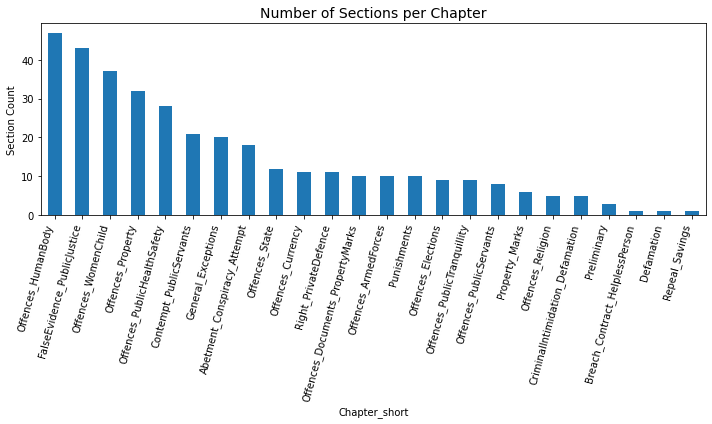

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
chapter_counts.plot(kind='bar')
plt.title("Number of Sections per Chapter", fontsize=14)
plt.ylabel("Section Count")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

## Chapter vs. Chapter_subtype

In [18]:
subtype_map = df[['Chapter', 'Chapter_short',
                  'Chapter_subtype']].drop_duplicates()
subtype_map = subtype_map.sort_values(['Chapter', 'Chapter_subtype'])

subtype_map

,Chapter,Chapter_short,Chapter_subtype
0,1,Preliminary,Preliminary
3,2,Punishments,Of punishments
13,3,General_Exceptions,General exceptions
33,3,Right_PrivateDefence,Of right of private defence
61,4,Abetment_Conspiracy_Attempt,Of attempt
60,4,Abetment_Conspiracy_Attempt,Of criminal conspiracy
44,4,Abetment_Conspiracy_Attempt,of abetment
87,5,Offences_WomenChild,"Of causing miscarriage, etc"
73,5,Offences_WomenChild,Of criminal force and assault against woman
92,5,Offences_WomenChild,Of offences against child


## Class Imbalance Severity

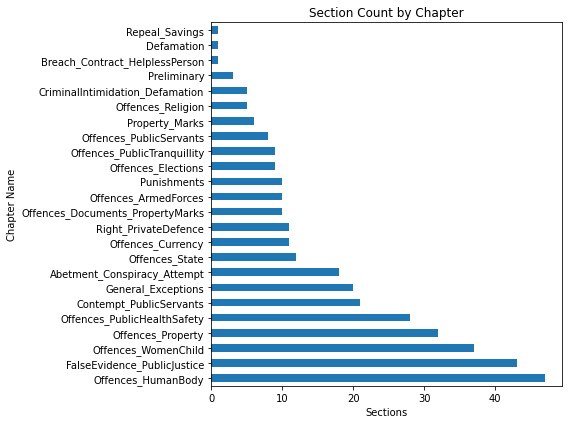

Imbalance ratio (max/min): 47.00


In [19]:
chapter_counts.plot(kind='barh', figsize=(8,6))
plt.title("Section Count by Chapter")
plt.xlabel("Sections")
plt.ylabel("Chapter Name")
plt.tight_layout()
plt.show()

imbalance_ratio = chapter_counts.max() / chapter_counts.min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")


In [20]:
chapter_counts = df['Chapter_short'].value_counts()
rare_chapters = chapter_counts[chapter_counts < 5].index.tolist()
df['Chapter_grouped'] = df['Chapter_short'].apply(
    lambda x: x if x not in rare_chapters else 'Other')

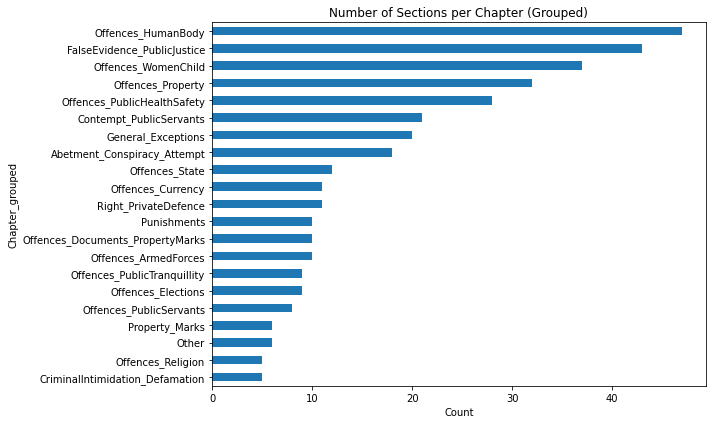

In [21]:
import matplotlib.pyplot as plt

df['Chapter_grouped'].value_counts().sort_values().plot(
    kind='barh', figsize=(10, 6))
plt.title("Number of Sections per Chapter (Grouped)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

In [22]:
df.to_csv('bns_processed.csv', index=False)